In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_csv = '/content/gdrive/MyDrive/diabetes(1).csv'

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4654 - accuracy: 0.8810
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1799 - accuracy: 0.9471
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1244 - accuracy: 0.9642
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0925 - accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0558 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9871
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0352 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9917
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.022

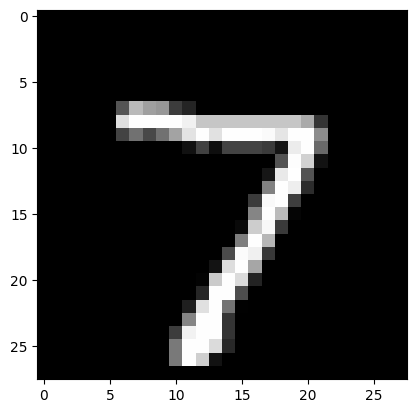

1/1 [==============================] - 0s 60ms/step
Predicted Class: 7


In [31]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.layers import Flatten
import matplotlib.pyplot as plt

# Diabetes Prediction Use Case
# Load the dataset
dataset = pd.read_csv(path_to_csv, header=None).values

X = dataset[:, 0:8]
Y = dataset[:, 8]

(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()

X_train_mnist, X_test_mnist = X_train_mnist / 255.0, X_test_mnist / 255.0

my_first_nn_mnist = Sequential()

my_first_nn_mnist.add(Flatten(input_shape=(28, 28)))

# Add hidden layers with sigmoid activation
my_first_nn_mnist.add(Dense(128, activation='sigmoid'))
my_first_nn_mnist.add(Dense(64, activation='sigmoid'))

my_first_nn_mnist.add(Dense(10, activation='softmax'))


my_first_nn_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

my_first_nn_mnist.fit(X_train_mnist, Y_train_mnist, epochs=10, initial_epoch=0)

print(my_first_nn_mnist.summary())
print(my_first_nn_mnist.evaluate(X_train_mnist, Y_train_mnist))

sample_image = X_test_mnist[0]
plt.imshow(sample_image, cmap='gray')
plt.show()

sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
prediction = my_first_nn_mnist.predict(sample_image)
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")